Dataset obtained from: https://archive.ics.uci.edu/dataset/1/abalone

# Prepare data

In [ ]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the dataframe and add column titles
cols = ["sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings"]
df = pd.read_csv("abalone.data", names=cols)

In [ ]:
# Check dataframe
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# Convert "sex" column values into integers
df["sex"] = pd.factorize(df["sex"])[0]

In [ ]:
# Check dataframe
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


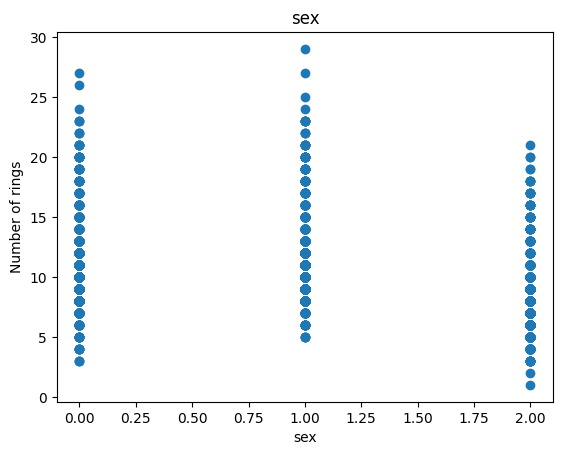

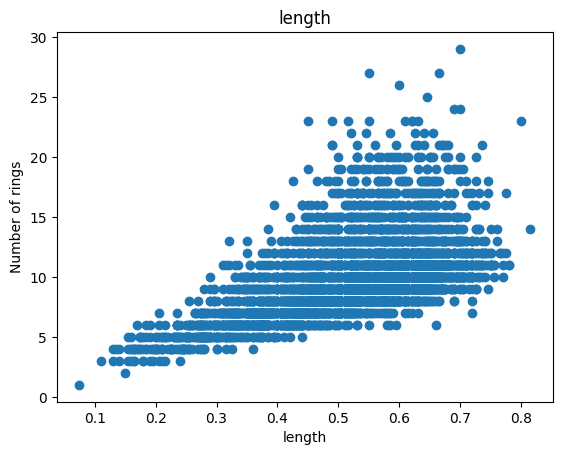

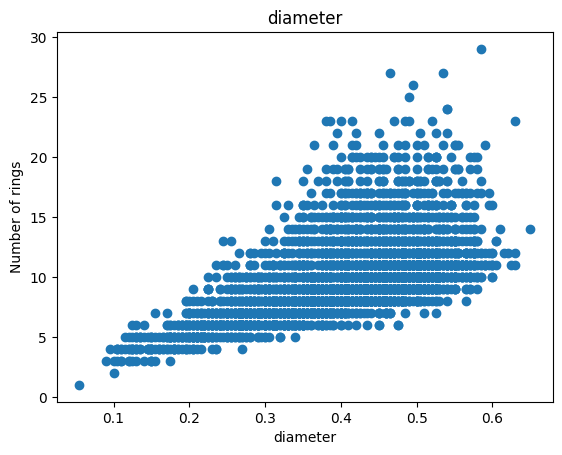

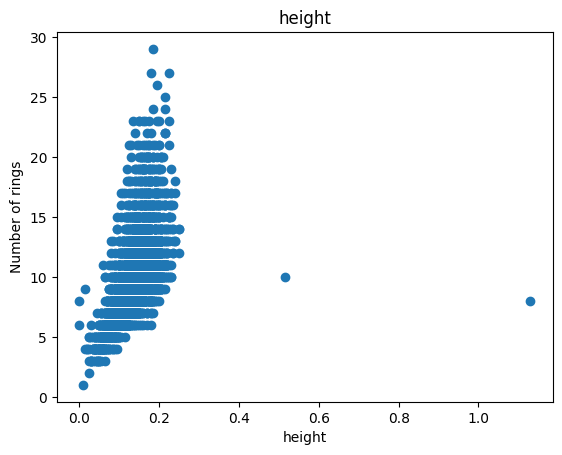

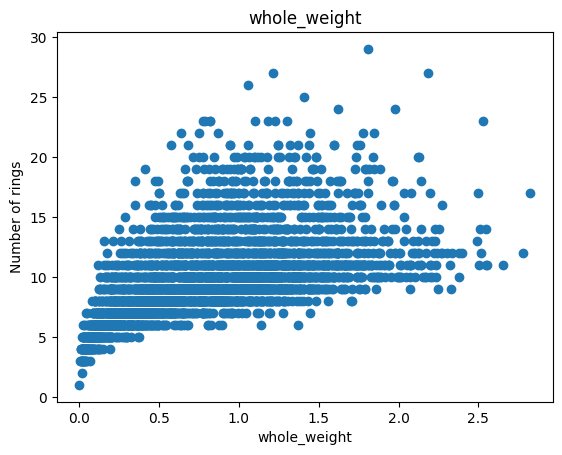

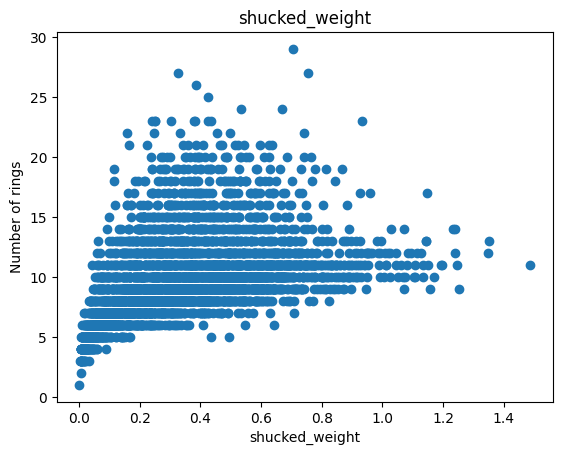

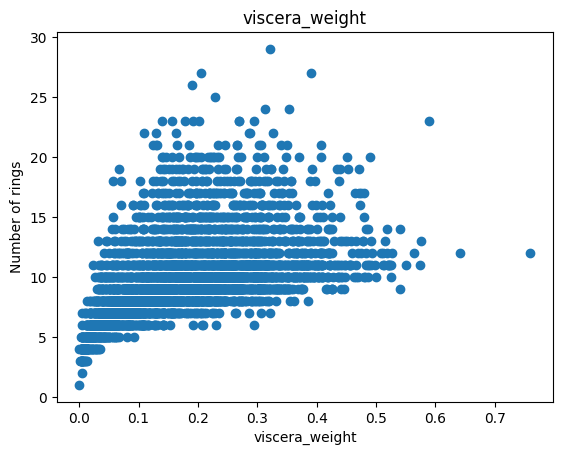

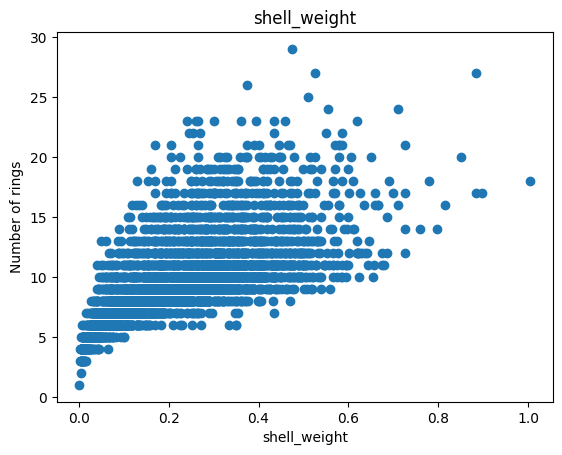

In [ ]:
# Show scatterplots of number of rings for each feature
for label in df.columns[:-1]:
  plt.scatter(df[label], df["rings"])
  plt.title(label)
  plt.ylabel("Number of rings")
  plt.xlabel(label)
  plt.show()

In [ ]:
# Remove columns with less helpful information
df = df.drop(["sex", "height"], axis=1)

In [ ]:
# Check dataframe
df.head()

,length,diameter,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.455,0.365,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.2050,0.0895,0.0395,0.055,7


# Split into training/validation/testing datasets

In [ ]:
# Shuffle and split data into train/valid/test
shuffled_df = df.sample(frac=1)
train_df, valid_df, test_df = np.split(shuffled_df, [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
# Get X and y for train/valid/test
X_train = train_df.iloc[:, :6].to_numpy()
y_train = train_df.iloc[:, 6].to_numpy()

X_valid = valid_df.iloc[:, :6].to_numpy()
y_valid = valid_df.iloc[:, 6].to_numpy()

X_test = test_df.iloc[:, :6].to_numpy()
y_test = test_df.iloc[:, 6].to_numpy()

# Linear Regression

In [ ]:
# Import statements
from sklearn.linear_model import LinearRegression

In [ ]:
# Create and train the model
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Score the model
linreg_model.score(X_test, y_test)

0.9348989351108127

# Ridge Regression

In [ ]:
# Import statements
from sklearn.linear_model import Ridge

In [ ]:
# Create and train the model
ridreg_model = Ridge()
ridreg_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Score the model
ridreg_model.score(X_test, y_test)

0.9343182237215762

# Neural Network

In [ ]:
# Import statements
import tensorflow as tf

In [ ]:
# Create and adapt the normalizer layer
normalizer = tf.keras.layers.Normalization(input_shape=(6,1), axis=-1)
normalizer.adapt(X_train),

(None,)

In [ ]:
# Create and train the model
nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')

nn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, verbose=0)

In [ ]:
# Test the model
y_pred = nn_model.predict(X_test)

27/27 [==============================] - 0s 3ms/step


In [ ]:
# Calculate and print Mean Squared Error
print(np.square(y_pred - y_test).mean())

0.012258431334568394
